In [69]:
import pandas as pd

df = pd.read_csv("static/training_mush.csv")
df

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6088,2,0,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,3,1,0
6089,3,2,2,0,2,1,0,1,0,1,...,6,7,0,2,1,0,7,4,0,1
6090,5,2,3,0,1,1,0,1,9,0,...,7,7,0,2,1,4,3,4,0,1
6091,3,2,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0


In [70]:
X = df.drop(['class'], axis=1)
y = df['class']

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


clf_rf = RandomForestClassifier(random_state=0)
params = {'n_estimators': range(10, 51, 10), 'max_depth': range(1, 13, 2), 'min_samples_leaf': range(1, 8),
          'min_samples_split': range(2, 10, 2)}
grid_search_cv_clf = GridSearchCV(clf_rf, params,cv=3, n_jobs=-1)
grid_search_cv_clf.fit(X, y)
test_X = pd.read_csv("static/testing_mush.csv")
# grid_search_cv_clf.best_params_
grid_search_cv_clf.predict(test_X).sum()
pred = grid_search_cv_clf.predict(X)

<Axes: >

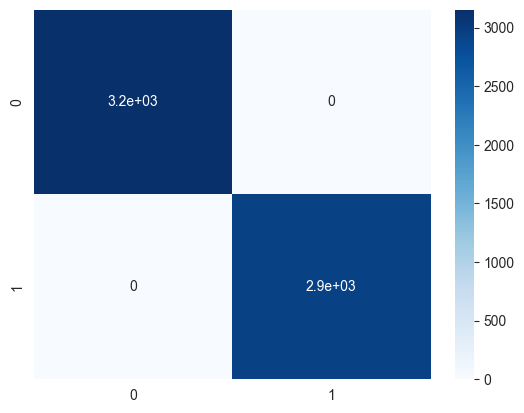

In [79]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, pred)
sns.heatmap(confusion_matrix(y, pred), annot=True, cmap="Blues")